In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 
df = pd.DataFrame.from_dict(data) 
df

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [3]:
le=LabelEncoder();
x=df.iloc[:,:-1]
x=x.apply(le.fit_transform)
print("Age:",list( zip(df.iloc[:,0], x.iloc[:,0])))
print("\nIncome:",list( zip(df.iloc[:,1], x.iloc[:,1])))
print("\nGender:",list( zip(df.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus:",list( zip(df.iloc[:,3], x.iloc[:,3])))


Age: [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income: [('high', 0), ('high', 0), ('high', 0), ('medium', 2), ('low', 1), ('low', 1), ('low', 1), ('medium', 2), ('low', 1), ('medium', 2), ('medium', 2), ('medium', 2), ('high', 0), ('medium', 2)]

Gender: [('male', 1), ('male', 1), ('male', 1), ('male', 1), ('female', 0), ('female', 0), ('female', 0), ('male', 1), ('female', 0), ('female', 0), ('female', 0), ('male', 1), ('female', 0), ('male', 1)]

maritialStatus: [('single', 1), ('married', 0), ('single', 1), ('single', 1), ('single', 1), ('married', 0), ('married', 0), ('single', 1), ('married', 0), ('single', 1), ('married', 0), ('married', 0), ('single', 1), ('married', 0)]


In [4]:
x

,age,income,gender,marital_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [5]:
y=df.iloc[:,-1]

In [6]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: buys, dtype: object

In [7]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [8]:
query=np.array([1,1,0,0])
pred=dt.predict([query])
pred[0]

'yes'

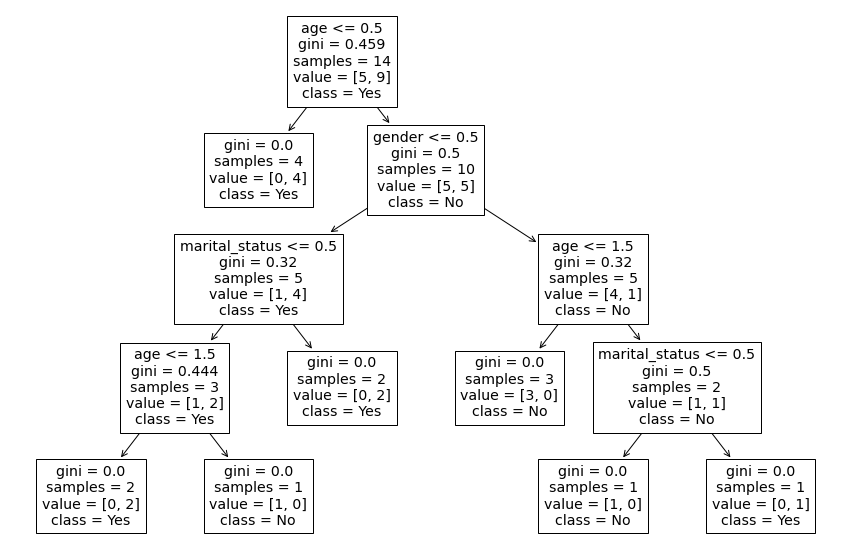

In [9]:
plt.figure(figsize=(15, 10)) 
_ = tree.plot_tree(dt, feature_names = x.columns, class_names =["No","Yes"])